In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from matplotlib import pyplot as plt

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [51]:
def read_data(D):
    X = []
    y = []
    for elem in D:
        X.append(list(elem[0]))
        y.append(elem[1])
    return np.array(X), np.array(y)

def read_2d_df(D):
    data = [[t[0][0], t[0][1], t[1]] for t in D]
    df = pd.DataFrame(data)
    return df.iloc[:,0:-1].values, df.iloc[:,-1].values, df

## Frage 1    

[1 3 1 1 2 2]
k= 1 :  [1]
k= 3 :  [2]
k= 5 :  [1]


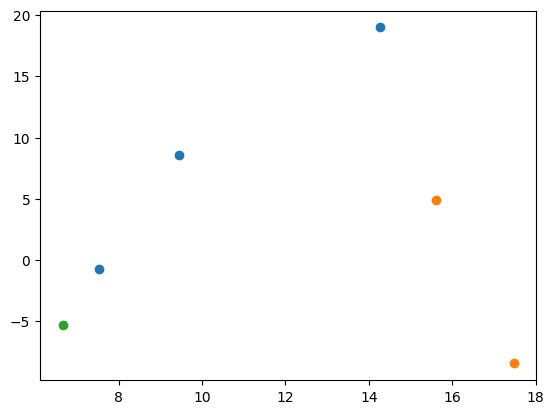

<Figure size 640x480 with 0 Axes>

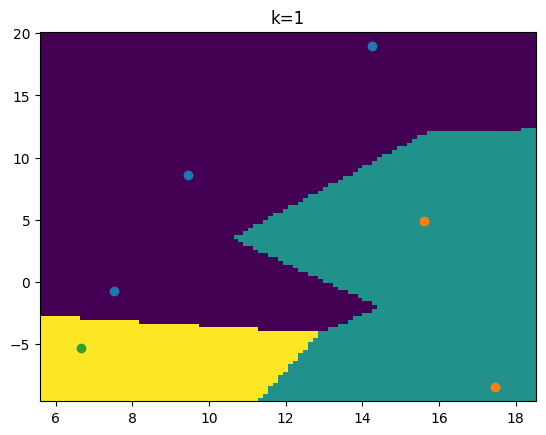

<Figure size 640x480 with 0 Axes>

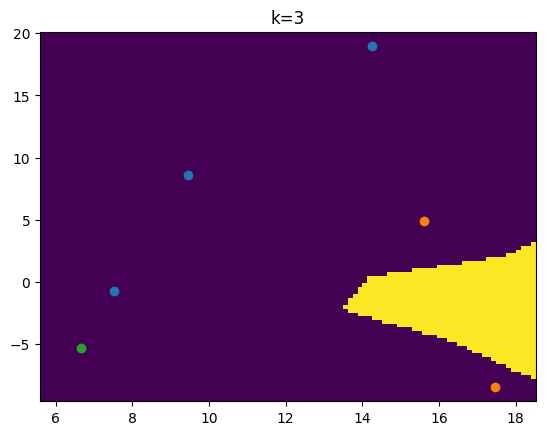

<Figure size 640x480 with 0 Axes>

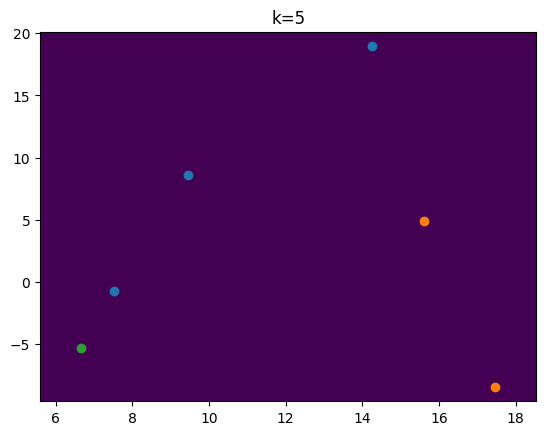

In [65]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.inspection import DecisionBoundaryDisplay
D={((14.26,18.98),1),((9.45,8.61),1),((7.53,-0.7),1),((15.62,4.92),2),((17.47,-8.43),2),((6.66,-5.27),3)}
X_train, y_train, df = read_2d_df(D)
x_pred = [13.92, -1.76]

print(y_train)
plt.figure()
plt.scatter(df[y_train==1][0], df[y_train==1][1])
plt.scatter(df[y_train==2][0], df[y_train==2][1])
plt.scatter(df[y_train==3][0], df[y_train==3][1])

for k in [1, 3, 5]:
    knn = KNeighborsClassifier(n_neighbors=k).fit(X_train, y_train)
    plt.figure()
    DecisionBoundaryDisplay.from_estimator(knn, X_train, response_method="predict", plot_method="pcolormesh")
    plt.scatter(df[y_train==1][0], df[y_train==1][1])
    plt.scatter(df[y_train==2][0], df[y_train==2][1])
    plt.scatter(df[y_train==3][0], df[y_train==3][1])
    plt.title("k="+str(k))
    print("k=", k, ": ", knn.predict(np.array(x_pred).reshape(1,-1)))

## Frage 2

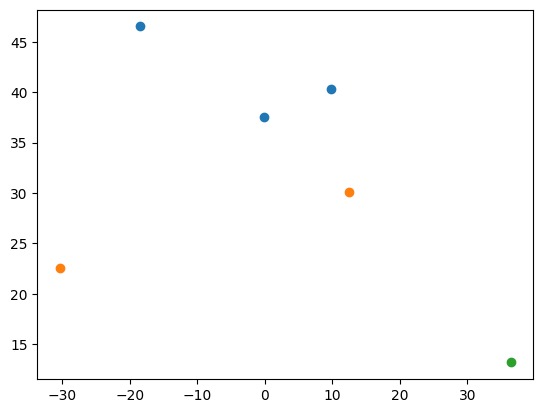

In [86]:
D={((9.8,40.29),1),((-0.1,37.54),1),((-18.46,46.52),1),((-30.33,22.56),2),((12.51,30.13),2),((36.45,13.2),3)}
X_train, y_train, df = read_2d_df(D)

plt.figure()
plt.scatter(df[y_train==1][0], df[y_train==1][1])
plt.scatter(df[y_train==2][0], df[y_train==2][1])
plt.scatter(df[y_train==3][0], df[y_train==3][1])


In [87]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)

print(np.round(X_train_scaled, 3), y_train)

[[ 0.501 -0.14 ]
 [-0.08   0.52 ]
 [-0.926  1.32 ]
 [ 0.376  0.765]
 [-1.473 -0.815]
 [ 1.604 -1.649]] [2 1 1 1 2 3]


In [74]:
x7 = [-4.2, 21.45]
x7_scaled = scaler.transform(np.array(x7).reshape(1,-1))

knn = KNeighborsClassifier(n_neighbors=3).fit(X_train_scaled, y_train)
#plt.figure()
#DecisionBoundaryDisplay.from_estimator(knn, X_train_scaled, response_method="predict", plot_method="pcolormesh")
#plt.scatter(X_train_scaled[y_train==1][0], X_train_scaled[y_train==1][1])
#plt.scatter(X_train_scaled[y_train==2][0], X_train_scaled[y_train==2][1])
#plt.scatter(X_train_scaled[y_train==3][0], X_train_scaled[y_train==3][1])
print(knn.predict(x7_scaled))

[1]


## Frage 3

In [85]:
from sklearn.neighbors import KNeighborsRegressor

D={((3.1,4.1),5.9),((2.6,5.3),5.8),((9.7,9.3),2.3),((8.4,6.2),6.4),((3.3,8.3),2.7),((9.5,0.2),8.8)}
X_train, y_train, df = read_2d_df(D)

reg = KNeighborsRegressor(n_neighbors=3).fit(X_train, y_train)
print(np.round(reg.predict(np.array([4.1,9.7]).reshape(1,-1)),3))

[4.967]
